In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


MOBILE NET 10 epok początek

Found 992 images belonging to 3 classes.
Found 444 images belonging to 3 classes.


/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 350, 350, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 351, 351, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 175, 175, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 175, 175, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

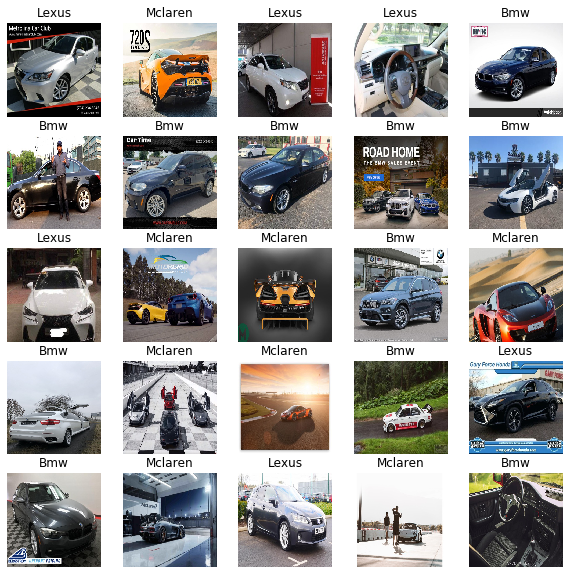

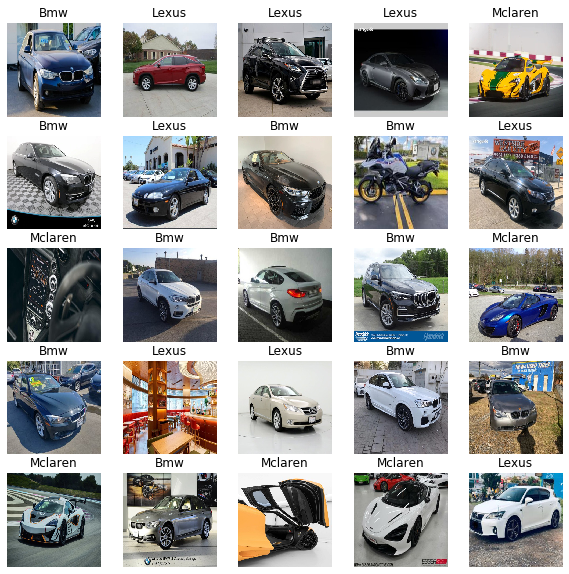

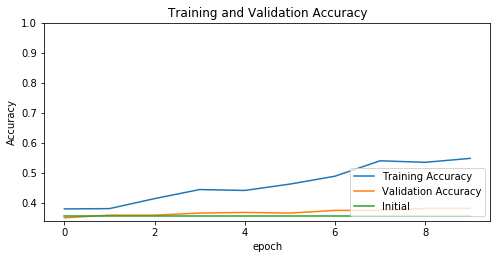

Found 444 images belonging to 3 classes.


In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import Path

# files = []
# for r, d, f in os.walk('./mro/HvEvC/corgi'):
#     print(d)

# for f in files:
#     print(f)


keras = tf.keras

data_dir = Path('./drive/My Drive/mro/BAL')
valid_dir = Path('./drive/My Drive/mro/test_BAL')

image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

IMG_HEIGHT = 350
IMG_WIDTH = 350
BATCH_SIZE = 32
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

valid_data_gen = image_generator.flow_from_directory(directory=str(valid_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

valid_image_batch, valid_label_batch = next(valid_data_gen)
show_batch(valid_image_batch, valid_label_batch)

from __future__ import absolute_import, division, print_function, unicode_literals

import os

import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf

keras = tf.keras

IMG_SHAPE = (IMG_WIDTH, IMG_HEIGHT, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

# Let's take a look at the base model architecture
base_model.summary()

feature_batch = base_model(image_batch)
print(feature_batch.shape)

from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import optimizers

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

prediction_layer = keras.layers.Dense(3, activation="softmax")
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.SGD(lr=base_learning_rate, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

base_model.trainable = False
model.summary()

len(model.trainable_variables)

initial_epochs = 10 #50
steps_per_epoch = BATCH_SIZE
validation_steps = 20

loss0,accuracy0 = model.evaluate(valid_data_gen, steps = validation_steps)

history = model.fit(train_data_gen,
                    epochs=initial_epochs,
                    validation_data=valid_data_gen)

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

initial = []
for i in range(len(val_acc)):
  initial.append(accuracy0)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot(initial, label="Initial")
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')
plt.show()

test_data_gen = image_generator.flow_from_directory(directory=str(valid_dir),
                                                     batch_size=300,
                                                     shuffle=False,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

test_data = test_data_gen[0]

v_predictions = model.predict(test_data)
v_predictions

v_predictions_cl = v_predictions.tolist()
v_predictions_cl[0]

res = []
for pred in v_predictions_cl:
  # p = list(map(lambda x: x.item(), pred))
  res.append(np.argmax(pred))
v_predictions_cl = res



MOBILE NET 50 epok początek

Found 992 images belonging to 3 classes.
Found 444 images belonging to 3 classes.


/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 350, 350, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 351, 351, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 175, 175, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 175, 175, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

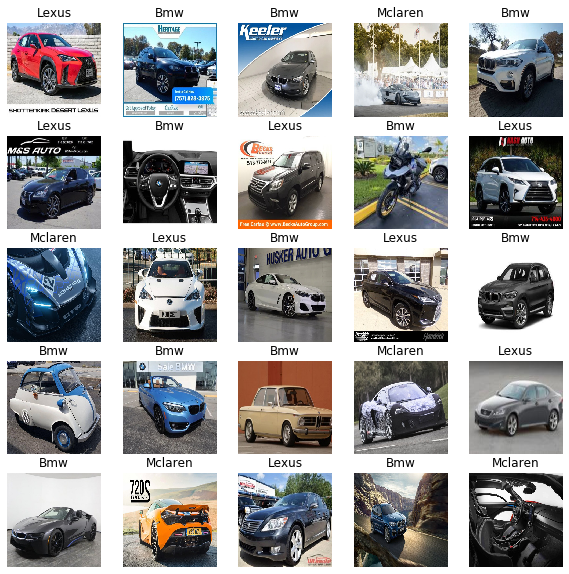

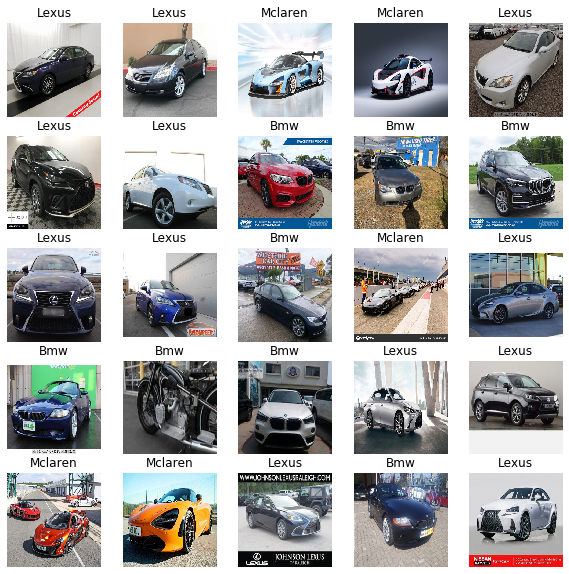

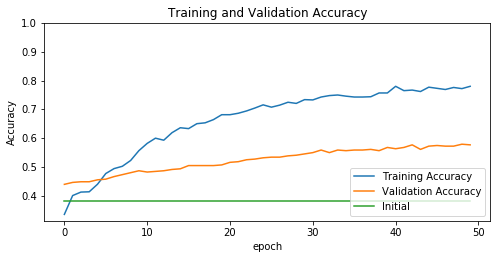

Found 444 images belonging to 3 classes.


In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import Path

# files = []
# for r, d, f in os.walk('./mro/HvEvC/corgi'):
#     print(d)

# for f in files:
#     print(f)


keras = tf.keras

data_dir = Path('./drive/My Drive/mro/BAL')
valid_dir = Path('./drive/My Drive/mro/test_BAL')

image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

IMG_HEIGHT = 350
IMG_WIDTH = 350
BATCH_SIZE = 32
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

valid_data_gen = image_generator.flow_from_directory(directory=str(valid_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

valid_image_batch, valid_label_batch = next(valid_data_gen)
show_batch(valid_image_batch, valid_label_batch)

from __future__ import absolute_import, division, print_function, unicode_literals

import os

import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf

keras = tf.keras

IMG_SHAPE = (IMG_WIDTH, IMG_HEIGHT, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

# Let's take a look at the base model architecture
base_model.summary()

feature_batch = base_model(image_batch)
print(feature_batch.shape)

from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import optimizers

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

prediction_layer = keras.layers.Dense(3, activation="softmax")
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.SGD(lr=base_learning_rate, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

base_model.trainable = False
model.summary()

len(model.trainable_variables)

initial_epochs = 50 #50
steps_per_epoch = BATCH_SIZE
validation_steps = 20

loss0,accuracy0 = model.evaluate(valid_data_gen, steps = validation_steps)

history = model.fit(train_data_gen,
                    epochs=initial_epochs,
                    validation_data=valid_data_gen)

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

initial = []
for i in range(len(val_acc)):
  initial.append(accuracy0)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot(initial, label="Initial")
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')
plt.show()

test_data_gen = image_generator.flow_from_directory(directory=str(valid_dir),
                                                     batch_size=300,
                                                     shuffle=False,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

test_data = test_data_gen[0]

v_predictions = model.predict(test_data)
v_predictions

v_predictions_cl = v_predictions.tolist()
v_predictions_cl[0]

res = []
for pred in v_predictions_cl:
  # p = list(map(lambda x: x.item(), pred))
  res.append(np.argmax(pred))
v_predictions_cl = res



VGG19 Without augmentation

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 992 images belonging to 3 classes.
Found 444 images belonging to 3 classes.
80142336/80134624 [==============================] - 3s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 350, 350, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 350, 350, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 350, 350, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 175, 175, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 175, 175, 128

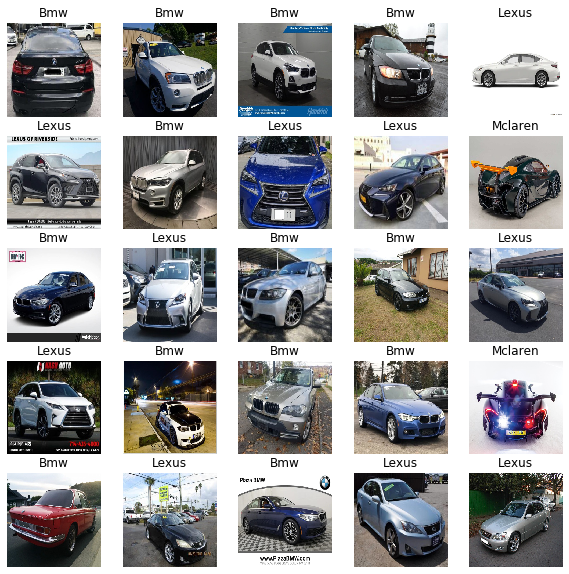

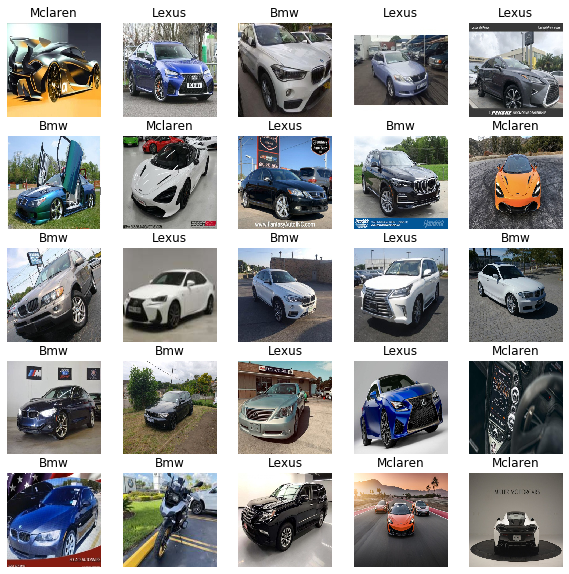

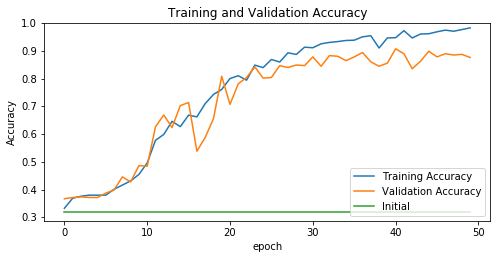

Found 444 images belonging to 3 classes.
TRUE : PREDICTED


ValueError: ignored

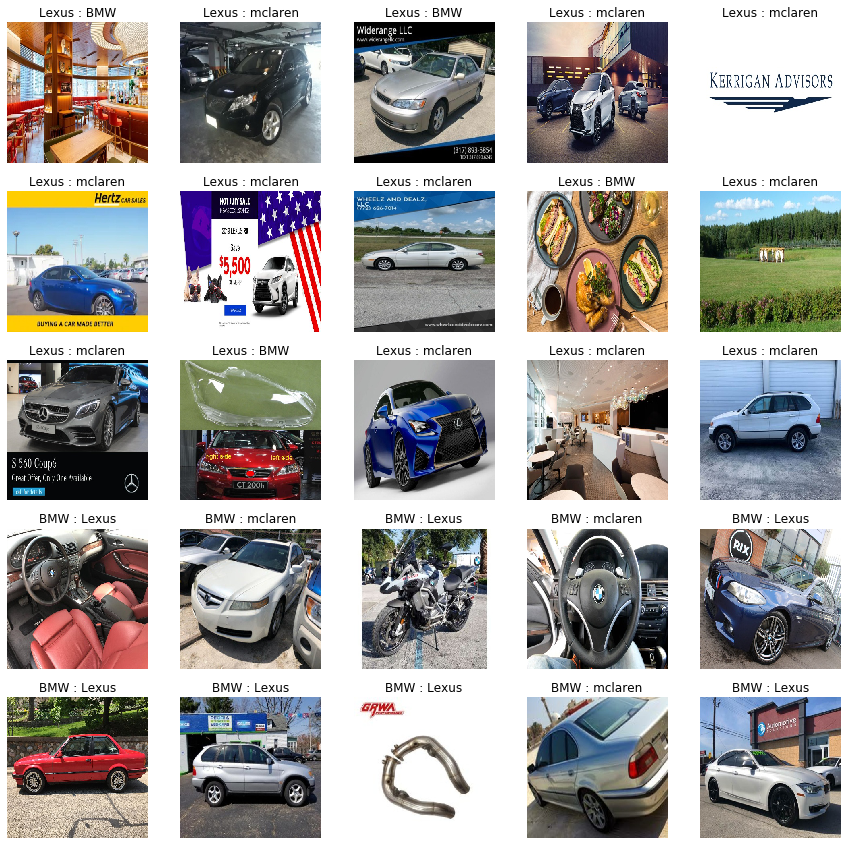

In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf

tf.reset_default_graph()

AUTOTUNE = tf.data.experimental.AUTOTUNE

import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pathlib

tf.__version__

from google.colab import drive
drive.mount('/content/drive')

data_dir = Path('./drive/My Drive/mro/BAL')
valid_dir = Path('./drive/My Drive/mro/test_BAL')

image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

image_count = len(list(valid_dir.glob('*/*.jpg')))
image_count

CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

# The 1./255 is to convert from uint8 to float32 in range [0,1].

BATCH_SIZE = 32
IMG_HEIGHT = 350
IMG_WIDTH = 350
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

valid_data_gen = image_generator.flow_from_directory(directory=str(valid_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

valid_image_batch, valid_label_batch = next(valid_data_gen)
show_batch(valid_image_batch, valid_label_batch)

from __future__ import absolute_import, division, print_function, unicode_literals

import os

import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf

keras = tf.keras

IMG_SHAPE = (IMG_WIDTH, IMG_HEIGHT, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.VGG19(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

for layer in base_model.layers[:5]:
  layer.trainable = False

# Let's take a look at the base model architecture
base_model.summary()

feature_batch = base_model(image_batch)
print(feature_batch.shape)

from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import optimizers

layer1 = keras.layers.Dense(1024, activation='relu')
layer1_batch = layer1(feature_batch)
print(layer1_batch.shape)

dropout_layer = keras.layers.Dropout(0.5)
dropout_layer_batch = dropout_layer(layer1_batch)
print(dropout_layer_batch.shape)

layer2 = keras.layers.Dense(1024, activation='relu')
layer2_batch = layer2(dropout_layer_batch)
print(layer2_batch.shape)

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(layer2_batch)
print(feature_batch_average.shape)

prediction_layer = keras.layers.Dense(3, activation="softmax")
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

model = tf.keras.Sequential([
  base_model,
  layer1,
  dropout_layer,
  layer2,
  global_average_layer,
  prediction_layer
])

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.SGD(lr=base_learning_rate, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

len(model.trainable_variables)

initial_epochs = 50
steps_per_epoch = BATCH_SIZE
validation_steps = 20

loss0,accuracy0 = model.evaluate(valid_data_gen, steps = validation_steps)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

history = model.fit(train_data_gen,
                    epochs=initial_epochs,
                    validation_data=valid_data_gen)

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

initial = []
for i in range(len(val_acc)):
  initial.append(accuracy0)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot(initial, label="Initial")
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')
plt.show()

test_data_gen = image_generator.flow_from_directory(directory=str(valid_dir),
                                                     batch_size=300,
                                                     shuffle=False,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

test_data = test_data_gen[0]

v_predictions = model.predict(test_data)
v_predictions

v_predictions_cl = v_predictions.tolist()
v_predictions_cl[0]

res = []
for pred in v_predictions_cl:
  # p = list(map(lambda x: x.item(), pred))
  res.append(np.argmax(pred))
v_predictions_cl = res

classes = []
for cl in test_data[1]:
  classes.append(np.argmax(cl))

i = 0
plt.figure(figsize=(15,15))
n=0
print('TRUE : PREDICTED')
for cl in v_predictions_cl:
  if cl != classes[i]:
      plt.imshow(test_data[0][i])
      ax = plt.subplot(5,5,n+1)
      plt.imshow(test_data[0][i])
      plt.title(CLASS_NAMES[classes[i]] + ' : ' + CLASS_NAMES[cl])
      plt.axis('off')
      n+=1
  i += 1


VGG19 with augmentation


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 992 images belonging to 3 classes.
Found 444 images belonging to 3 classes.
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 350, 350, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 350, 350, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 350, 350, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 175, 175, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 175, 175, 128)     73856     
________________________________________________

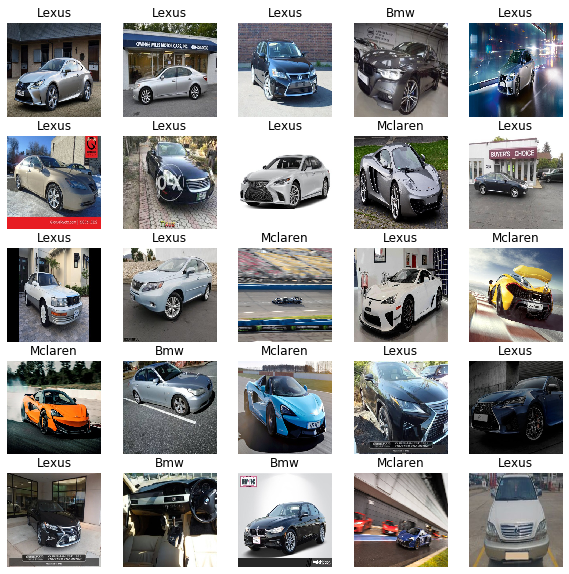

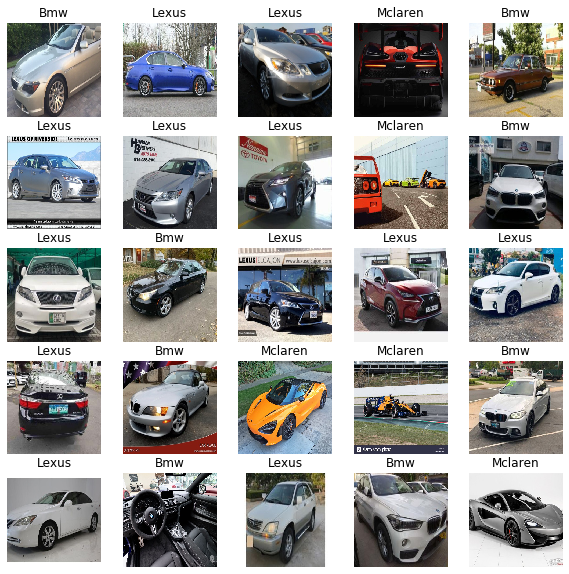

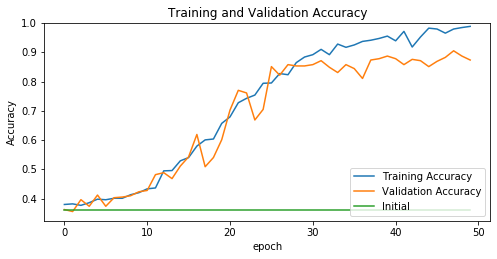

Found 444 images belonging to 3 classes.
TRUE : PREDICTED


ValueError: ignored

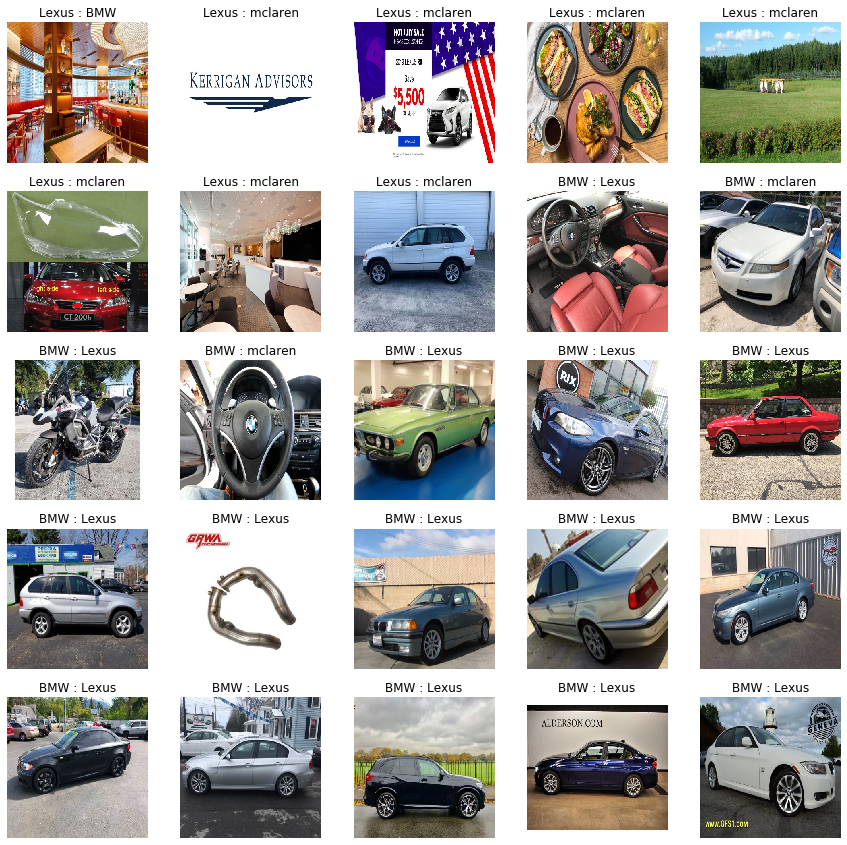

In [9]:
from __future__ import absolute_import, division, print_function, unicode_literals
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf

tf.reset_default_graph()

AUTOTUNE = tf.data.experimental.AUTOTUNE

import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pathlib

tf.__version__

from google.colab import drive
drive.mount('/content/drive')

data_dir = Path('./drive/My Drive/mro/BAL')
valid_dir = Path('./drive/My Drive/mro/test_BAL')

image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

image_count = len(list(valid_dir.glob('*/*.jpg')))
image_count

CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

BATCH_SIZE = 32
IMG_HEIGHT = 350
IMG_WIDTH = 350
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

train_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=30)

test_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=30)

train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

valid_data_gen = image_generator.flow_from_directory(directory=str(valid_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

valid_image_batch, valid_label_batch = next(valid_data_gen)
show_batch(valid_image_batch, valid_label_batch)

from __future__ import absolute_import, division, print_function, unicode_literals

import os

import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf

keras = tf.keras

IMG_SHAPE = (IMG_WIDTH, IMG_HEIGHT, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.VGG19(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

for layer in base_model.layers[:5]:
  layer.trainable = False

# Let's take a look at the base model architecture
base_model.summary()

feature_batch = base_model(image_batch)
print(feature_batch.shape)

from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import optimizers

layer1 = keras.layers.Dense(1024, activation='relu')
layer1_batch = layer1(feature_batch)
print(layer1_batch.shape)

dropout_layer = keras.layers.Dropout(0.5)
dropout_layer_batch = dropout_layer(layer1_batch)
print(dropout_layer_batch.shape)

layer2 = keras.layers.Dense(1024, activation='relu')
layer2_batch = layer2(dropout_layer_batch)
print(layer2_batch.shape)

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(layer2_batch)
print(feature_batch_average.shape)

prediction_layer = keras.layers.Dense(3, activation="softmax")
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

model = tf.keras.Sequential([
  base_model,
  layer1,
  dropout_layer,
  layer2,
  global_average_layer,
  prediction_layer
])

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.SGD(lr=base_learning_rate, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

len(model.trainable_variables)

initial_epochs = 50
steps_per_epoch = BATCH_SIZE
validation_steps = 20

loss0,accuracy0 = model.evaluate(valid_data_gen, steps = validation_steps)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

history = model.fit(train_data_gen,
                    epochs=initial_epochs,
                    validation_data=valid_data_gen)

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

initial = []
for i in range(len(val_acc)):
  initial.append(accuracy0)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot(initial, label="Initial")
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')
plt.show()

test_data_gen = image_generator.flow_from_directory(directory=str(valid_dir),
                                                     batch_size=300,
                                                     shuffle=False,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

test_data = test_data_gen[0]

v_predictions = model.predict(test_data)
v_predictions

v_predictions_cl = v_predictions.tolist()
v_predictions_cl[0]

res = []
for pred in v_predictions_cl:
  # p = list(map(lambda x: x.item(), pred))
  res.append(np.argmax(pred))
v_predictions_cl = res

classes = []
for cl in test_data[1]:
  classes.append(np.argmax(cl))

i = 0
plt.figure(figsize=(15,15))
n=0
print('TRUE : PREDICTED')
for cl in v_predictions_cl:
  if cl != classes[i]:
      plt.imshow(test_data[0][i])
      ax = plt.subplot(5,5,n+1)
      plt.imshow(test_data[0][i])
      plt.title(CLASS_NAMES[classes[i]] + ' : ' + CLASS_NAMES[cl])
      plt.axis('off')
      n+=1
  i += 1


Cartoons VGG19

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf

tf.reset_default_graph()

AUTOTUNE = tf.data.experimental.AUTOTUNE

import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pathlib

tf.__version__

from google.colab import drive
drive.mount('/content/drive')

data_dir = Path('./drive/My Drive/mro/cartoon')
valid_dir = Path('./drive/My Drive/mro/test_cartoon')

image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

image_count = len(list(valid_dir.glob('*/*.jpg')))
image_count

CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

BATCH_SIZE = 32
IMG_HEIGHT = 350
IMG_WIDTH = 350
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

train_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=30)

test_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=30)

train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

valid_data_gen = image_generator.flow_from_directory(directory=str(valid_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

valid_image_batch, valid_label_batch = next(valid_data_gen)
show_batch(valid_image_batch, valid_label_batch)

from __future__ import absolute_import, division, print_function, unicode_literals

import os

import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf

keras = tf.keras

IMG_SHAPE = (IMG_WIDTH, IMG_HEIGHT, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.VGG19(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

for layer in base_model.layers[:5]:
  layer.trainable = False

# Let's take a look at the base model architecture
base_model.summary()

feature_batch = base_model(image_batch)
print(feature_batch.shape)

from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import optimizers

layer1 = keras.layers.Dense(1024, activation='relu')
layer1_batch = layer1(feature_batch)
print(layer1_batch.shape)

dropout_layer = keras.layers.Dropout(0.5)
dropout_layer_batch = dropout_layer(layer1_batch)
print(dropout_layer_batch.shape)

layer2 = keras.layers.Dense(1024, activation='relu')
layer2_batch = layer2(dropout_layer_batch)
print(layer2_batch.shape)

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(layer2_batch)
print(feature_batch_average.shape)

prediction_layer = keras.layers.Dense(3, activation="softmax")
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

model = tf.keras.Sequential([
  base_model,
  layer1,
  dropout_layer,
  layer2,
  global_average_layer,
  prediction_layer
])

base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.SGD(lr=base_learning_rate, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

len(model.trainable_variables)

initial_epochs = 50
steps_per_epoch = BATCH_SIZE
validation_steps = 20

loss0,accuracy0 = model.evaluate(valid_data_gen, steps = validation_steps)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

history = model.fit(train_data_gen,
                    epochs=initial_epochs,
                    validation_data=valid_data_gen)

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

initial = []
for i in range(len(val_acc)):
  initial.append(accuracy0)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.plot(initial, label="Initial")
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')
plt.show()

test_data_gen = image_generator.flow_from_directory(directory=str(valid_dir),
                                                     batch_size=300,
                                                     shuffle=False,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

test_data = test_data_gen[0]

v_predictions = model.predict(test_data)
v_predictions

v_predictions_cl = v_predictions.tolist()
v_predictions_cl[0]

res = []
for pred in v_predictions_cl:
  # p = list(map(lambda x: x.item(), pred))
  res.append(np.argmax(pred))
v_predictions_cl = res

classes = []
for cl in test_data[1]:
  classes.append(np.argmax(cl))

i = 0
plt.figure(figsize=(15,15))
n=0
print('TRUE : PREDICTED')
for cl in v_predictions_cl:
  if cl != classes[i]:
      plt.imshow(test_data[0][i])
      ax = plt.subplot(5,5,n+1)
      plt.imshow(test_data[0][i])
      plt.title(CLASS_NAMES[classes[i]] + ' : ' + CLASS_NAMES[cl])
      plt.axis('off')
      n+=1
  i += 1
